# Descriptive statistics: common pdf and CDF

- [Recap on quantities describing distribution functions](#Descriptive)
    * [Population Statistics](#Population-statistics)
    * [Sample Statistics](#Sample-statistics)
    * [Bias of an estimator](#Bias-of-an-estimator:)
- [Some very common distributions](#Some-very-common-distributions:)    
     * [Gaussian distribution](#Gaussian-or-normal-distribution)
     * [Uniform distribution](#Uniform-distribution)
     * [Chi2 distribution](#chi2)
     * [Poisson distribution](#Poisson-distribution)
     * [Binomial distribution](#Binomial)

# Recap on quantities describing distribution functions   <a class="anchor" id="Descriptive"></a>



## Population statistics

These are the quantities that allow to define the "location", "shape" and "width" of a distribution $h(x)$. Note here that we consider a description of the "true" (population) distribution, that we why we use the notation $h(x)$ (i.e. this is NOT the distribution we infer from the data but the true underlying distribution). 

### Arithmetic mean (also known expectation value):

$$
\mu \, =\, E(x) \, = \, \int_{-\infty}^{+\infty} x\,h(x)\,{\rm d}x
$$

Note that the "expected/expectation value " is also often writen $<x>$.  

### Variance

$$
V = \int_{-\infty}^{+\infty} (x-\mu)^2\,h(x)\,{\rm d}x
$$

### Standard deviation

$$
\sigma \, = \, \sqrt{V}
$$

### Skewness

$$
\Sigma = \int_{-\infty}^{+\infty} \left( \frac{x-\mu}{\sigma}\right)^3\,h(x)\,{\rm d}x
$$

Skweness describes how "asymmetric" is the distribution

### Kurtosis

$$
K \, = \, \int_{-\infty}^{+\infty} \left( \frac{x-\mu}{\sigma}\right)^4\,h(x)\,{\rm d}x - 3
$$

Kurtosis describes how "peaky" is the distribution (note the subtraction by 3 which allows us to have K=0 for a gaussian distribution). Kurtosis > 0 means that the distribution if more peaked than a gaussian.  

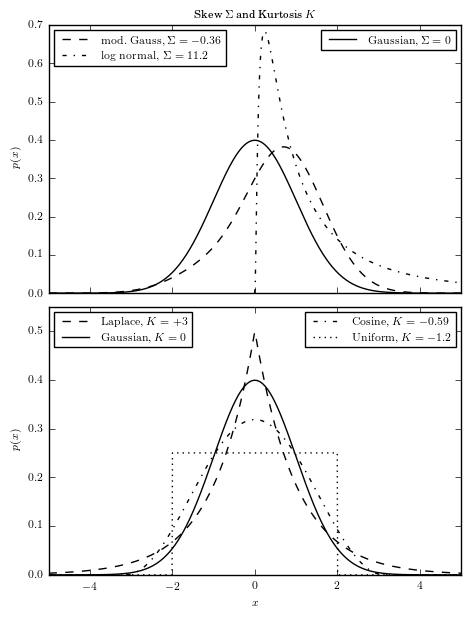

In [8]:
# Figure 3.6 from "Statistics, Data Mining, and Machine Learning in Astronomy"
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

fig = plt.figure(figsize=(5, 6.25))
fig.subplots_adjust(right=0.95, hspace=0.05, bottom=0.07, top=0.95)

# First show distributions with different skeq
ax = fig.add_subplot(211)
x = np.linspace(-8, 8, 1000)
N = stats.norm(0, 1)

l1, = ax.plot(x, N.pdf(x), '-k',
              label=r'${\rm Gaussian,}\ \Sigma=0$')

l2, = ax.plot(x, 0.5 * N.pdf(x) * (2 + x + 0.5 * (x * x - 1)),
              '--k', label=r'${\rm mod.\ Gauss,}\ \Sigma=-0.36$')
l3, = ax.plot(x[499:], stats.lognorm(1.2).pdf(x[499:]), '-.k',
              label=r'$\rm log\ normal,\ \Sigma=11.2$')

ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.7001)
ax.set_ylabel('$p(x)$')
ax.xaxis.set_major_formatter(plt.NullFormatter())

# trick to show multiple legends
leg1 = ax.legend([l1], [l1.get_label()], loc=1)
leg2 = ax.legend([l2, l3], (l2.get_label(), l3.get_label()), loc=2)
ax.add_artist(leg1)
ax.set_title('Skew $\Sigma$ and Kurtosis $K$')

# next show distributions with different kurtosis
ax = fig.add_subplot(212)
x = np.linspace(-5, 5, 1000)
l1, = ax.plot(x, stats.laplace(0, 1).pdf(x), '--k',
              label=r'${\rm Laplace,}\ K=+3$')
l2, = ax.plot(x, stats.norm(0, 1).pdf(x), '-k',
              label=r'${\rm Gaussian,}\ K=0$')
l3, = ax.plot(x, stats.cosine(0, 1).pdf(x), '-.k',
              label=r'${\rm Cosine,}\ K=-0.59$')
l4, = ax.plot(x, stats.uniform(-2, 4).pdf(x), ':k',
              label=r'${\rm Uniform,}\ K=-1.2$')

ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.55)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

# trick to show multiple legends
leg1 = ax.legend((l1, l2), (l1.get_label(), l2.get_label()), loc=2)
leg2 = ax.legend((l3, l4), (l3.get_label(), l4.get_label()), loc=1)
ax.add_artist(leg1)

plt.show()

An example of distributions with different skewness $\Sigma$ (top panel) and kurtosis $K$ (bottom panel). The modified Gaussian in the upper panel is a normal distribution multiplied by a Gram-Charlier series, with $a_0 = 2$, $a_1 = 1$, and $a_2 = 0.5$. The log-normal has $\sigma = 1.2$.

## Sample statistics

We speak of **sample statistics** when the quantities described above are directly deduced **from the data**. If we assume that we have $N$ measurements ${x_i}$, then we can calculate **estimators** of the various quantities (assuming for the moment that the uncertainty of $x_i$ is negligible - a measurement of $x$ is a delta function-, or at least much smaller than the range of x_i) describing the pdf.  

### Estimator of the mean:    

$$
\hat{\mu} \, =\, {\bar{x}} = \sum_{i=1}^{N} \frac{x_i}{N}
$$

There is various notations for the estimator of the mean. Our [book](#book) uses $\bar{x}$, but I prefer to simply add a "hat" ($\hat{ }$) on top of the estimated quantity (i.e. estimated based on the data). You may also find $\hat{x}$ for the estimator of the mean. 

### Estimator of the Standard deviation:

$$
\hat{\sigma} = \,s \, = \sqrt{ \sum_{i=1}^{N} \frac{(x_i-\bar{x})^2}{N-1} }
$$

Note here the factor N-1 because, said shortly, we have already used 1 d.o.f.  to estimate ${\bar{x}}$. Thanks to this "correction", $s^2$ is an *unbiased* estimator of the variance. 

Also, keep in mind that $s$ IS NOT the error on $\bar{x}$. The error on $\bar{x}$ is given by the **standard error on the mean** which is given (for large $N$ and ${\bar{x}}$ following a gaussian distrib.) by:    
$$
stde = \sigma_{\bar{x}}= \frac{s}{\sqrt{N}}
$$

This expression is also valid if the standard deviation of the parent population is known (i.e. not derived from the data).

### ABOUT VARIANCE calculation by NUMPY:

The variance in numpy is the average of the squared deviations from the mean, i.e., $\sigma^2 = mean(abs(x -$ `x.mean()`$)^2)$, where the mean is calculated as `x.sum()`$/ N$, where $N = $`len(x)`. If, however, `ddof` is specified (i.e. `np.var(x, ddof)`), the divisor $N - {\rm ddof}$ is used instead.

=> If you want to have $N-1$ at the denominator use `np.var(x, ddof=1)`. By default ddof=0. The same is true for the calculation of the standard deviation  `np.std(x, ddof=1)`. 

### Bias of an estimator:

An estimator is called biased, if its value does not converge to the "truth" (i.e. to the quantity it estimates as derived knowing the true distribution). The bias is defined as the *expectation value* (i.e. average) of the difference between an estimator and its population value:

$$
bias \, = \, E(\hat{q} - q) \, = <\,\hat{q} - q \,> 
$$
where $q$ represents any statistical quantity, and $\hat{q}$ its estimator. 

In addition to the bias, estimators are also characterized by some *variance* $V$. The *mean squared error* is often used to judge the quality of an estimator: 

$$
{\rm MSE} \, = \, V + bias^2 
$$

Note also that statisticians also speak of "consistency" of an estimator, which is different from the bias. An estimator is called consistent if its value, obtained for an infinitely large sample, converges to its "true" value, and its variance $V$ vanishes. Surprisingly, an estimator can be unbiased, but not consistent. Imagine that you estimate the mean of your sample simply based on the first value you measure (this won't -generally- be a maximum likelihood estimator but you can do this !). Then, even if ~~your sample becomes infinitely large~~ you repeat your experiment an infinitely large number of times, the expectation value of the mean converges to 0 but the expectation of the variance will not. 

In [9]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from IPython.html.widgets import interact
from ipywidgets import interact
def plot_dist(x,n, continuous=True, distname=''):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4.5))
    if continuous:
        density = n.pdf
        title = "Probability Density Function (pdf)"
        plot_symbol = '-'
    else:
        density = n.pmf
        title = "Probability Mass Function"
        plot_symbol = 'bo'
        
    distribution = density(x)
    ax1.plot(x, distribution, plot_symbol, color="blue", label=distname)
    if continuous:
        ax1.fill_between(x, 0, distribution, color="blue", alpha=0.6)
    else:
        ax1.vlines(x, 0, distribution, colors='b', lw=5, alpha=0.5)
    ax1.set_title(title)
    
    if distname=='gauss':
    # Plot mean and sigma for gaussian
        x1, x2, x3 = n.mean(), n.mean()-n.std(), n.mean()+n.std()
        ax1.vlines(x1, 0, n.pdf(x1), color='black')
        ax1.vlines(x2, 0, n.pdf(x2), color='red')
        ax1.vlines(x3, 0, n.pdf(x3), color='red')
        
        ax2.hlines(0.5, min(x), n.mean())
        ax2.vlines(n.mean(), 0, 0.5)
        ax2.hlines(0.5-0.3413, min(x), n.mean()-n.std(), color='red')
        ax2.vlines(n.mean()-n.std(), 0, 0.5-0.3413, color='red')
        ax2.hlines(0.5+0.3413, min(x), n.mean()+n.std(), color='red')
        ax2.vlines(n.mean()+n.std(), 0, 0.5+0.3413, color='red')

    cdf = n.cdf(x)
    ax2.plot(x, cdf, lw=1, color="blue", label=distname)
    ax2.fill_between(x, 0, cdf, color="blue", alpha=0.6)
    ax2.set_title("CDF")
    

    return ax1, ax2

# Note, this function is adapted from Daniela Huppenkothen and Fernando Perez 
# https://github.com/dhuppenkothen/ClassicalStatsPython

# Some very common distributions:

## Gaussian or normal distribution

$$
N(x | \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}
$$

Parameters: 

* $\mu$ : central peak location
* $\sigma$: peak width

Expectation: $\mu$

Standard Deviation: $\sigma$

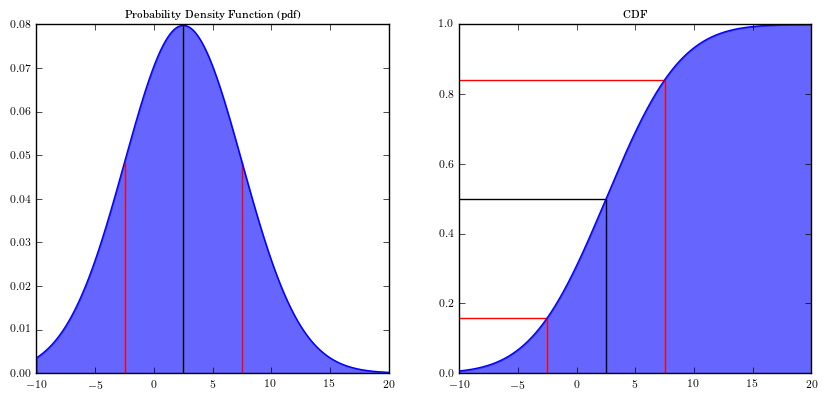

In [10]:
def normal(m,s):
    x = np.linspace(-10, 20, 2000)
    n = scipy.stats.norm(m, s)
    plot_dist(x,n, distname='gauss')
    return

interact(normal, m=(-5.,10.), s=(0.001, 10.0));

## Uniform distribution


$$
p(x \, | \, \mu, W) = \frac{1}{W} ~ \mathrm{for}~|x-\mu| \leq \frac{W}{2}, ~\mathrm{and~0~otherwise}
$$

Parameters: $\mu$, W 

Expectation: $\mu$

Standard Deviation: W / sqrt{12}


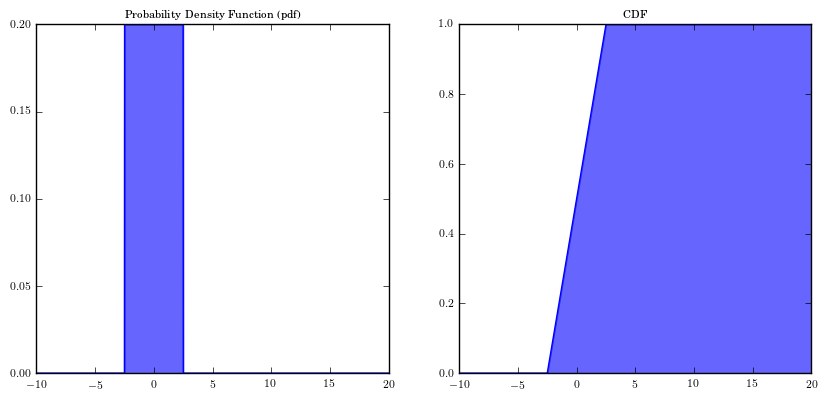

In [11]:
def uniform(m,s):
    x = np.linspace(-10, 20, 2000)
    m2 = m-s/2.
    n = scipy.stats.uniform(m2, s)   # Define m2 because first argument is left edge
    plot_dist(x,n)
    return

interact(uniform, m=(-10,10), s=(0.001, 10.0));


# Chi square ($\chi^2$) distribution   <a class="anchor" id="chi2"></a>

If {x_i} are drawn from a gaussian distribution $N(\mu, \sigma)$, and if we define $z_i = (x - \mu)/\sigma$, and
$Q = \sum_{i=1}^{N} z_i^2$, the $\chi^2$ distribution, with $k$ degrees of freedom is:      

$$
p(Q/k) \equiv \chi^2(Q \, |\, k) =  \frac{1} {(2\,\Gamma(k/2))}  (Q/2)^{k/2-1}  \exp(-Q/2)
$$

Parameters: $k$  (dof)

Expectation: $k$ 

Standard deviation: $\sqrt{2\,k}$ 

Note that $\Gamma(k) \, \equiv \, (k-1)!$ ($k>0$). 

It is convenient to define $\chi^2_{{\rm dof}} \, \equiv \, \chi^2(Q/k \, |\, k)$ which has a mean of 1, and a standard deviation $\sqrt{2/k}$. 

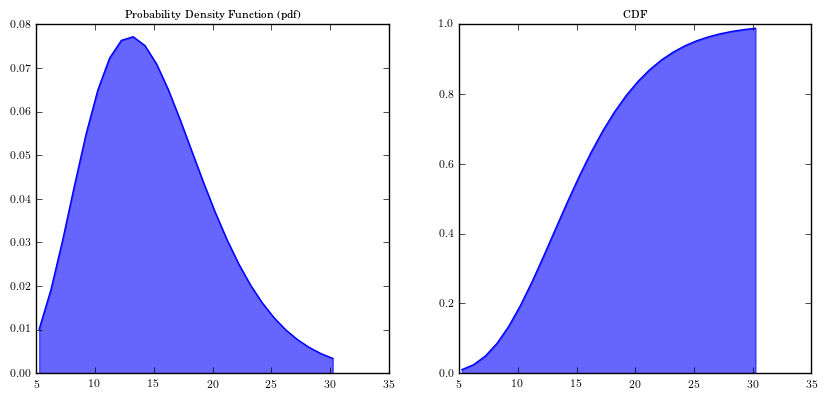

In [13]:
def chi2(k):
    d = scipy.stats.chi2(k)
    x = np.arange(d.ppf(0.01), d.ppf(0.99))
    plot_dist(x, d, continuous=True)
    return

interact(chi2, k=(1,20,1));

### Poisson distribution

$$
\rm{Pois}(k|\lambda) = \frac{\lambda^ke^{-\lambda}}{k!}
$$

Parameters: $\lambda$ - Anticipated number of (random) events

Expectation: $\lambda$

Standard Deviation: $\sqrt{\lambda}$

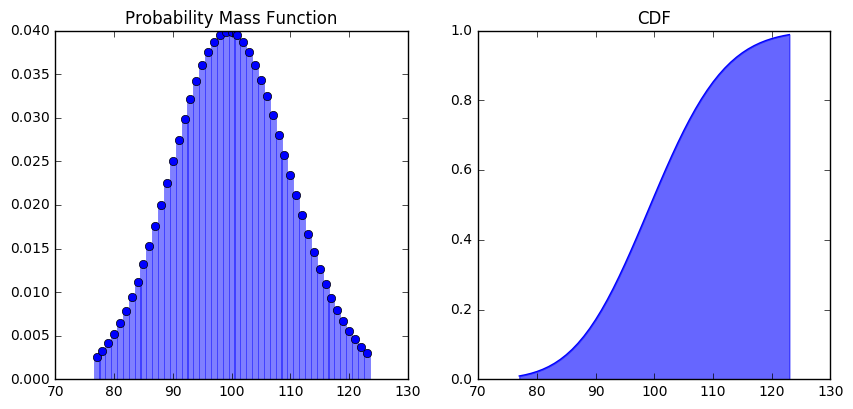

In [8]:
def poisson(m):
    d = scipy.stats.poisson(m)
    x = np.arange(d.ppf(0.01), d.ppf(0.99))
    plot_dist(x, d, continuous=False)
    return

interact(poisson, m=(1,200,1));

# Binomial

$$
B(k|n,p) = \binom{n}{k}p^k(1-p)^{n-k}
$$

Parameters: 

* $n$ : Number of trials
* $p$ : Probability of trial being successful

Expectation: $np$

Standard Deviation: $\sqrt{np(1-p)}$

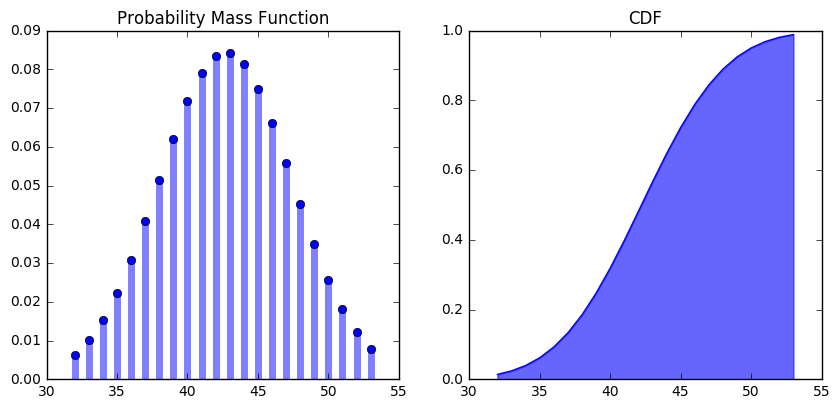

In [15]:
def binomial(sample, success):
    d = scipy.stats.binom(sample, success)
    x = np.arange(d.ppf(0.01), d.ppf(0.99))
    plot_dist(x, d, continuous=False)
    return

interact(binomial, sample=(1,200,1), success=(0.01,1,0.01));

# X. References and supplementary material:

Chapter 3 (3.2) of the book Statistics, data mining and Machine learning in astronomy by Z. Ivezic et al. in Princeton Series in Modern Astronomy.

All of statistics: a concise course in statistical inference, Wasserman 2004 (see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/).

Numerical recipes by Press et al. Cambridge University press: Chapter 14